# Multiscale Energy Systems MILP

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


## Problem Statement

In this example, we highlight the scenario aggregation capabilities of energiapy

The following case study considers three locations along with their fluctuating local demand, weather profiles (capacity factors), and resource (natural gas) prices. The goal is to simultaneously meet the demand for power and hydrogen in Houston through all available technology options.

The problem can be modeled over three scales

0, network scale with 1 time period where the network decisions such as setting up a unit are taken

1, a daily scale for convenience with 365 time periods, if the demand is to be met on a daily basis

2, scheduling and demand scales with 8760 time periods, where the resource flows are determined

The following processes are considered - 

- Modular nuclear reactors (ASMR)
- Alkaline Water Electrolyzers (AWE)
- Hydrogen Storage (H2_L_c/H2_L_d)
- Natural Gas Combined Cycle with 95% carbon capture (NGCC)
- Pumped Storage Hydropower (PSH/PSH_discharge)
- Lithium-ion batteries (LiI/LiI_discharge)
- Solar Photovoltaics (PV) 
- Wind Farms (WF)
- Steam Methane Reforming (SMR)
- SMR + Carbon Capture Utilization and Storage (SMRH)
- Hydrogen Fuel Cells (H2FC)
- Direct Air Capture (DAC)
- Offshore Aquifers (AQoff)

The stated processes utilize the following resources:

- Methane (CH4)
- Carbon Dioxide (CO2)
- CO2 in aquifer (CO2_AQoff)
- CO2 Captured from air (CO2_DAC)
- Vented CO2 (CO2_Vent)
- Hydrogen (H2)
- Water (H2O)
- Stored hydrogen (H2_L)
- Power stored in LiI (LiI_Power)
- Oxygen (O2)
- Power stored in PSH (PSH_Power)
- Power
- Solar
- Uranium
- Wind

Given the large problem size, the model can be aggregated using Agglomerative Hierarchial Clustering (AHC) which provides a set of representative days over which the problem can be solve. Understandably, there is a loss of model accuracy.



## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making


*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
    min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
    + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
    Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
    P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
    \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
    S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t} \in R_{\geq 0}
\end{equation}



## Import modules

In [1]:
import sys
sys.path.append('../../src')

In [2]:

from energiapy.components.result import Result
import pandas
import numpy
from itertools import product
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.components.transport import Transport
from energiapy.components.scenario import Scenario
from energiapy.components.network import Network
from energiapy.components.location import Location
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.temporal_scale import TemporalScale
from energiapy.aggregation.reduce_scenario import reduce_scenario, Clustermethod


## Data Import

The following data is needed for the model

- solar and wind profiles : energiapy.fetch_nsrdb_data imports data from the NREL NSRDB database
- power demand : ERCOT for Houston
- Natural Gas prices: Henry Hub 


**Get Weather data**

In [3]:
weather20_df = pandas.read_csv('../data/ho_solar20.csv', index_col=0)
weather_df = weather20_df[~weather20_df.index.str.contains(
    '02-29')]  # remove leap days

**import natural gas prices**

Natural gas prices are from the Henry price index at a daily temporal resolution.

The energia.make_henry_price_df function implicitly fills in gaps in data such as weekends and public holidays by repeating the last recorded prices For e.g. if the 4th of July will use the price for the 3rd of July a typical saturday and sunday will take the values for the last friday.

The stretch functionality stretches the values over the hourly temporal scale (8760) from a daily temporal scale (365), again through repetition.

Moreover, we can remove outliers usig the remove_outliers features in data_utils

The stretch feature allows you to stretch the data over the annual scale, by repeating the same daily values over the hours in a day. This is important for hierarchial clustering as the lengths need to match

In [4]:
ng_price20 = make_henry_price_df(
    file_name='../data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv', year=2020, stretch = True)
ng_price_df = ng_price20.drop(columns='scales')

In [5]:
ng_price_df

,CH4
0,0.093304
1,0.093304
2,0.093304
3,0.093304
4,0.093304
...,...
8755,0.105357
8756,0.105357
8757,0.105357
8758,0.105357


**Import demand data**

Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region

In [6]:

ercot20 = pandas.read_excel('../data/Native_Load_2020.xlsx')
ercot20['index'] = weather20_df.index
ercot20 = ercot20.set_index('index')
ercot20 = ercot20[~ercot20.index.str.contains('02-29')]
demand_df = ercot20[['COAST']]


## Define temporal scale


The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization (We will cluster to get representative days)
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.

In [7]:
scales = TemporalScale(discretization_list=[1, 365, 24])


## Declare resources

Resources can be consumed, produced, stored, discharged (or sold). Resources measured as mass (sparing Uranium) are quantified on a per metric ton basis, energy feedstock and resources us a Mega Watt (MW) basis.

- Power and Hydrogen (H2) have varying demands which are captured using deterministic data inputs
- Methane (CH4) has varying purchase price

**Big and small M**

In [8]:
bigM = 10**6
smallM = 10


In [9]:

Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', label='Power generated',
                 varying=[VaryingResource.DETERMINISTIC_DEMAND])

LiI_Power = Resource(name='LiI_Power', basis='MW',
                     label='Power in LiI', store_max=10000, store_min=smallM)

PSH_Power = Resource(name='PSH_Power', basis='MW',
                     label='Power in PSH', store_max=10000, store_min=smallM)


Uranium = Resource(name='Uranium', cons_max=bigM,
                   price=42.70/(250/2), basis='kg', label='Uranium')

H2 = Resource(name='H2', basis='tons', label='Hydrogen', demand=True)

H2_L = Resource(name='H2_L', basis='tons', label='Hydrogen',
                block='Resource', store_max=10000, store_min=smallM)

CO2_AQoff = Resource(name='CO2_AQoff', basis='tons',
                     label='Carbon dioxide - sequestered', sell=True)

H2O = Resource(name='H2O', cons_max=bigM,
               price=0.001, basis='tons', label='Water', block='Resource')

CH4 = Resource(name='CH4', cons_max=bigM, price=1, basis='tons',
               label='Natural gas', varying=[VaryingResource.DETERMINISTIC_PRICE])

CO2 = Resource(name='CO2', basis='tons',
               label='Carbon dioxide', block='Resource')

CO2_Vent = Resource(name='CO2_Vent', sell=True, basis='tons',
                    label='Carbon dioxide - Vented')

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

CO2_DAC = Resource(name='CO2_DAC', basis='tons',
                   label='Carbon dioxide - captured')


## Declare processes

Technology costs are derived from the NREL ATB and conversion factors are derived from literature.

- Solar photovoltaics (PVs) and wind farms (WFs) are subject to intermittent capacity rates

In [10]:

LiI = Process(name='LiI', conversion={Power: -1, LiI_Power: 1}, capex=3516428, fopex=87910,
              vopex=0, store_max=10000, store_min=smallM, prod_max=bigM, prod_min=smallM, label='Lithium-ion battery', basis='MW')

LiI_discharge = Process(name='LiI', conversion={Power: 1, LiI_Power: -1}, capex=0.1,
                        fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Lithium-ion battery (d)', basis='MW')

WF = Process(name='WF', conversion={Wind: -1, Power: 1}, capex=1462000, fopex=43000, vopex=4953,
             prod_max=bigM, prod_min=smallM,  label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 1}, capex=1333262, fopex=22623, vopex=0,
             prod_max=bigM, prod_min=smallM,  varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

SMRH = Process(name='SMRH', conversion={Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 1.03, CO2: 9.332}, capex=2520000, fopex=945000, vopex=51.5,
               prod_max=bigM, prod_min=smallM,  label='Steam methane reforming + CCUS')

NGCC = Process(name='NGCC', conversion={Power: 1, CH4: -0.108, CO2_Vent: 0.297*0.05, CO2: 0.297 *
               0.95}, capex=2158928, fopex=53320, vopex=4090, prod_max=bigM, prod_min=smallM,  label='NGCC + 95% CC')

SMR = Process(name='SMR', capex=2400, fopex=800, vopex=0.03,  conversion={
              Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 9.4979}, prod_max=bigM, prod_min=smallM,  label='Steam methane reforming')

H2FC = Process(name='H2FC', conversion={H2: -0.050, Power: 1}, capex=1.6 *
               10**6, vopex=3.5, fopex=0, prod_max=bigM, prod_min=smallM,  label='hydrogen fuel cell')

DAC = Process(name='DAC', capex=0.02536, fopex=0.634, vopex=0, conversion={
              Power: -0.193, H2O: -4.048, CO2_DAC: 1}, prod_max=bigM, prod_min=smallM,  label='Direct air capture')

PSH = Process(name='PSH', conversion={Power: -1, PSH_Power: 1},  capex=3924781,
              fopex=17820, vopex=512.5, prod_max=bigM, prod_min=smallM, store_min=smallM, store_max=1000, label='Pumped storage hydropower', basis='MW')

PSH_discharge = Process(name='LiI', conversion={Power: 1, PSH_Power: -1},  capex=0.1,
                        fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Pumped storage hydropower (d)', basis='MW')

H2_L_c = Process(name='H2_L_c', conversion={Power: -0.417, H2_L: 1, H2: -1}, capex=1.6 *
                 10**6, vopex=3.5, fopex=0, prod_max=bigM, prod_min=smallM,  label='Hydrogen geological storage')

H2_L_d = Process(name='H2_L_d', conversion={H2_L: -1, H2: 1}, capex=0.01, vopex=0.001,
                 fopex=0, prod_max=bigM, prod_min=smallM,  label='Hydrogen geological storage discharge')

DAC = Process(name='DAC', conversion={Power: -0.193, H2O: -4.048, CO2_DAC: 1},
              capex=730, fopex=114, vopex=3.6, prod_max=bigM, prod_min=smallM,  label='Direct air capture')

ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1},
               capex=7988951, fopex=0.04*0.730, vopex=0, prod_max=bigM, prod_min=smallM, label='Small modular reactors (SMRs)')

AWE = Process(name='AWE', conversion={Power: -1, H2: 0.019, O2: 0.7632, H2O: -0.1753}, capex=1.1*10**6, fopex=16918,
              vopex=0, prod_max=bigM, prod_min=smallM, label='Alkaline water electrolysis (AWE)', citation='Demirhan et al. 2018 AIChE paper')

AqOff = Process(name='AqOff', conversion={Power: -1.28, CO2_AQoff: 1, CO2: -1}, capex=5.52,
                vopex=4.14, fopex=0, prod_max=bigM, prod_min=smallM,   label='Offshore aquifer CO2 sequestration (SMR)')


**Declare the set of processes to consider**

In [11]:
process_set = {LiI, WF, PV, SMRH, SMR, DAC,
               AWE, H2_L_c, H2_L_d, AqOff, ASMR, PSH, NGCC}


## Declare location



The following deterministic data inputs are provide:

1. demand factors for Power and Hydrogen (H2) at an hourly resolution (demand_scale_level = 2)
2. price factors for Methane (CH4) at a daily resolution (price_scale_level = 1)
3. capacity factors for solar photovoltaics (PV) and wind farms (WF) at an hourly resolution (capacity_scale_level = 2)
4. capex, fopex, and vopex factors at an annual resolution for all processes (expenditure_scale_level = 0)


In [12]:
houston = Location(name='HO', processes=process_set, capacity_factor={PV: weather_df[['dni']], WF: weather_df[['wind_speed']]}, demand_factor={Power: demand_df}, price_factor={
                   CH4: ng_price_df}, scales=scales, label='Houston', expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, price_scale_level=2)


## Declare scenario


The demand needs to be stated here for each resource at location.
energiapy handles demand not stated at a per location level by meeting the demand across all locations
Similarly, if resources are not stated the demand is met using all resources with demand (Process.demand = True). This does not make sense for resources with different basis but might be useful if the model needs to meet the demand for similar resources from different sources.

The scales need to be stated here to help generate the scenario:

1. expenditure scale level - technology expenditure decisions 
2. scheduling scale level - scheduling decisions such as production levels for process; purchase, discharge (sale), consumption, and inventory levels for resources  
3. network scale level - design of network i.e. the location and capacity sizing of production and storage facilities on a per unit basis
4. demand scale level - to meet the demand of a resource. Note that if this is higher than the scale for demand factor at location, energiapy will sum the demand across the lower scale
5. purchase scale level - purchase of resources that can be consumed. Needs to match the price scale level at location level

In [13]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, scheduling_scale_level=2,
                    network_scale_level=0, demand_scale_level=2, purchase_scale_level=2, label='full_case', demand={houston: {H2: 1000, Power: 1000}})


**Visualization of scenario data**

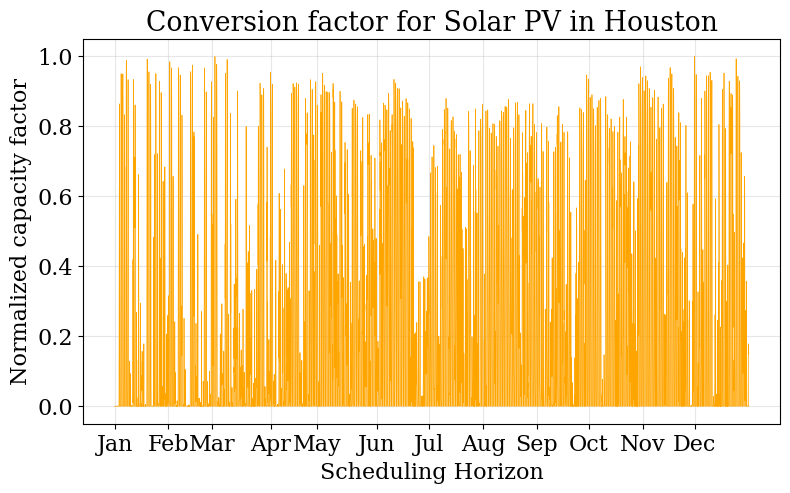

In [14]:

plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='orange')


![PV capacity factor](plots/cf_pv.png)

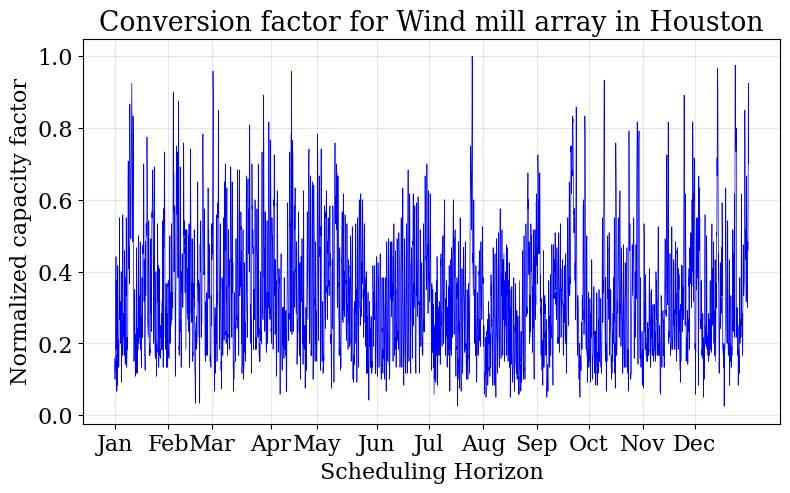

In [15]:

plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=WF, fig_size=(9, 5), color='blue')


![WF capacity factor](plots/cf_wf.png)

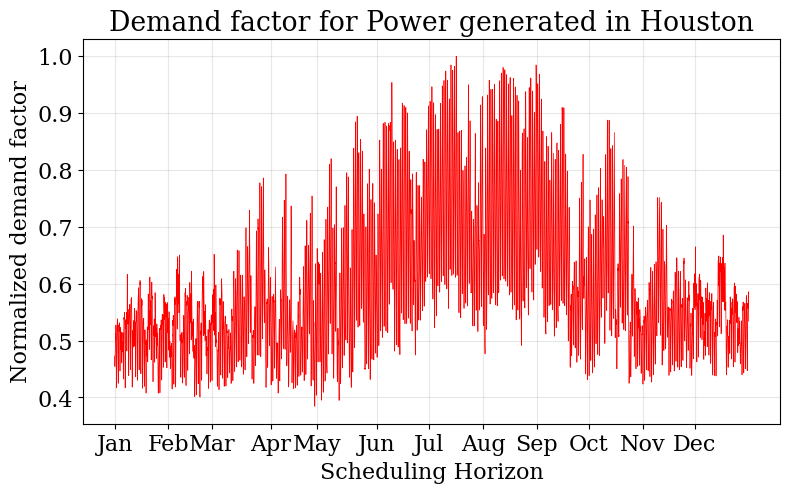

In [16]:

plot_scenario.demand_factor(
    scenario=scenario, location=houston, resource=Power, fig_size=(9, 5), color='red')


![Power demand factor](plots/df_pw.png)

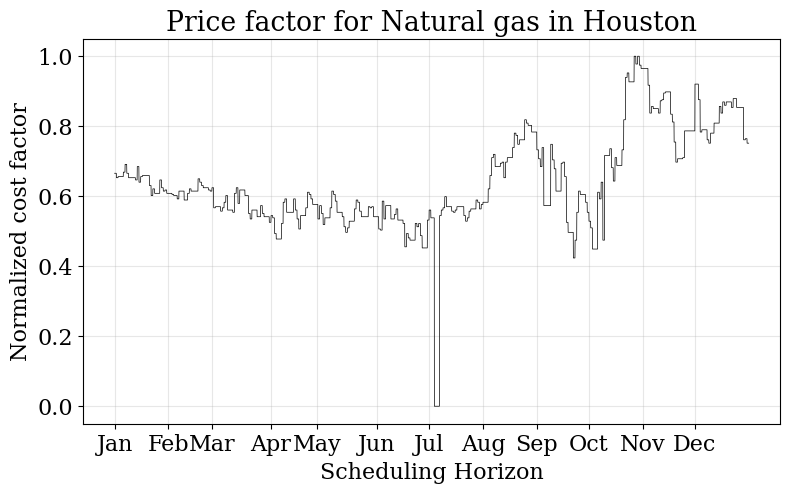

In [17]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=CH4, fig_size=(9, 5), color='black')


![Natural gas price factor](plots/pf_ng.png)

## Formulate MILP

In [18]:
milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK}, objective=Objective.COST)


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint location capex
constraint location fopex
constraint location vopex
constraint location incidental
constraint network capex
constraint network fopex
constraint network vopex
constraint network incidental
constraint nameplate inventory
constraint storage max
constraint storage min
constraint production mode
constraint nameplate production
constraint production max
constraint production min
constraint inventory balance
constraint resource consumption
constraint resource purchase
constraint location production
constraint location discharge
constraint location consumption
constraint location purchase
constraint network production
constraint network discharge
constraint network consumption
constraint network purchase
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost


## Optimize for minimum cost

In [19]:

results = solve(scenario=scenario, instance=milp_cost, solver='gurobi',
                     name=f"results_slsp_cost", print_solversteps=True, saveformat='.pkl')


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 481962 rows, 411875 columns and 1353617 nonzeros
Model fingerprint: 0xe5464b38
Variable types: 411859 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+06]
Presolve removed 346058 rows and 311013 columns
Presolve time: 1.62s
Presolved: 135904 rows, 100862 columns, 425068 nonzeros
Variable types: 100850 continuous, 12 integer (12 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   35885    1.8351454e+12   0.000000e+00   4.998690e+09      5s
Concur

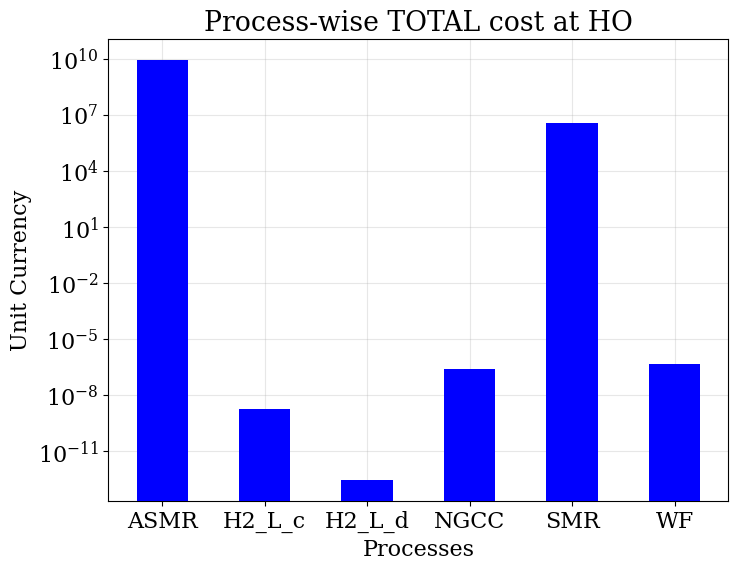

In [20]:
plot_results.cost(results=results, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(8, 6))

![Total Costs](plots/total.png)

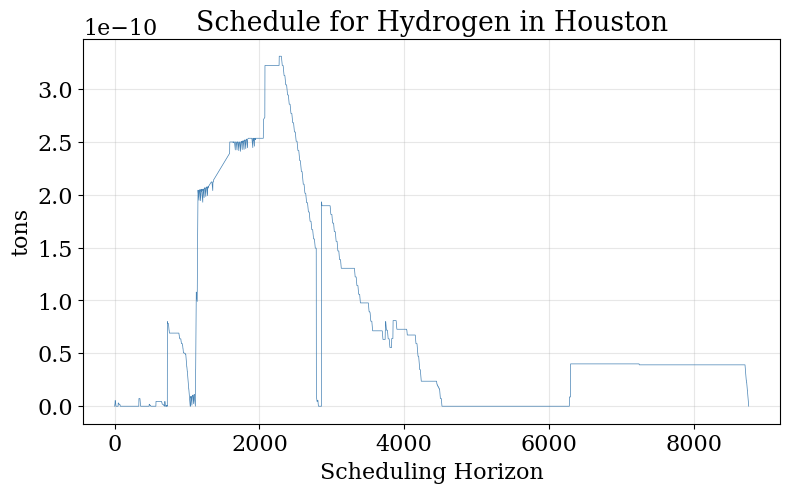

In [21]:

plot_results.schedule(results=results, y_axis='Inv', component='H2_L',
                      location='HO', fig_size=(9, 5), color='steelblue')

![Schedule for H2L](plots/sch_h2l.png)

## Reduce scenario 

In [22]:
from energiapy.aggregation.ahc import agg_hierarchial, agg_hierarchial_elbow, IncludeAHC, Fit

In [23]:
from pyearth import Earth
import matplotlib.pyplot as plt
def mars_elbow(wcss:list, range_list:list):
    X = [numpy.array([i]) for i in range(len(wcss))]
    mars = Earth()
    mars.fit(X, wcss)
    y_hat = mars.predict(X)
    y_line = y_hat ## for plotting
    #determine the elbow point
    m = numpy.diff(y_line)/numpy.diff(range(len(wcss)))
    m = [numpy.round(i, 2) for i in m]
    m_un = list(set(m))
    elbow = max([m.index(i) + range_list[0] for i in sorted(m_un)])
    
    fig, ax = plt.subplots(figsize=(8, 6))
    x = range_list
    
    ax.plot(x, y_line, label = 'MARS fit', color = 'steelblue', alpha = 0.6)

    ax.scatter(x, wcss, color = 'indianred')
    plt.axvline(x = elbow, alpha = 0.6, linestyle = 'dotted', label = f"elbow at {elbow}", color = 'slategrey', zorder = 3)    

    plt.title(f'Clustering using AHC for Houston for cost and demand')
    plt.xlabel('Cluster Size')
    plt.ylabel('WCSS')
    plt.grid(alpha=0.3)
    plt.legend()
    
    return elbow 


In [24]:
range_list = list(range(30, 120))
# wcss = agg_hierarchial_elbow(scenario= scenario, scale_level=1, include= [IncludeAHC.CAPACITY, IncludeAHC.DEMAND, IncludeAHC.COST], range_list = range_list)


In [25]:
# elbow = mars_elbow(wcss, range_list)

In [27]:
scenario_reduced, repdays, info =  reduce_scenario(scenario=scenario, periods=55, scale_level=1, method=Clustermethod.AHC, include = [IncludeAHC.CAPACITY, IncludeAHC.DEMAND, IncludeAHC.COST])


In [28]:
milp_reduced = formulate(scenario= scenario_reduced, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK}, objective=Objective.COST)

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint location capex
constraint location fopex
constraint location vopex
constraint location incidental
constraint network capex
constraint network fopex
constraint network vopex
constraint network incidental
constraint nameplate inventory
constraint storage max
constraint storage min
constraint production mode
constraint nameplate production
constraint production max
constraint production min
constraint inventory balance
constraint resource consumption
constraint resource purchase
constraint location production
constraint location discharge
constraint location consumption
constraint location purchase
constraint network production
constraint network discharge
constraint network consumption
constraint network purchase
constraint storage facility
constraint production facility
constraint min production facility
constraint min storage facility
constraint demand
objective cost


In [29]:
results_reduced = solve(scenario = scenario_reduced, instance= milp_reduced, solver= 'gurobi', name=f"reduced_res", print_solversteps = True)


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 72762 rows, 62195 columns and 204209 nonzeros
Model fingerprint: 0x982b058e
Variable types: 62179 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [4e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+06]
Presolve removed 52270 rows and 46985 columns
Presolve time: 0.20s
Presolved: 20492 rows, 15210 columns, 64068 nonzeros
Variable types: 15198 continuous, 12 integer (12 binary)
Found heuristic solution: objective 7.689937e+10
Found heuristic solution: objective 8.968144e+09

Root relaxation: objective 8.892675e+09, 9368 iterations, 0.31 seconds (0.37 work units)

    Nodes    |    Current Node    |     Objective Bounds      |    

In [30]:
error = (results.output['objective'] - results_reduced.output['objective'])*100/results.output['objective']


In [32]:
error*100

-0.1861519563120341

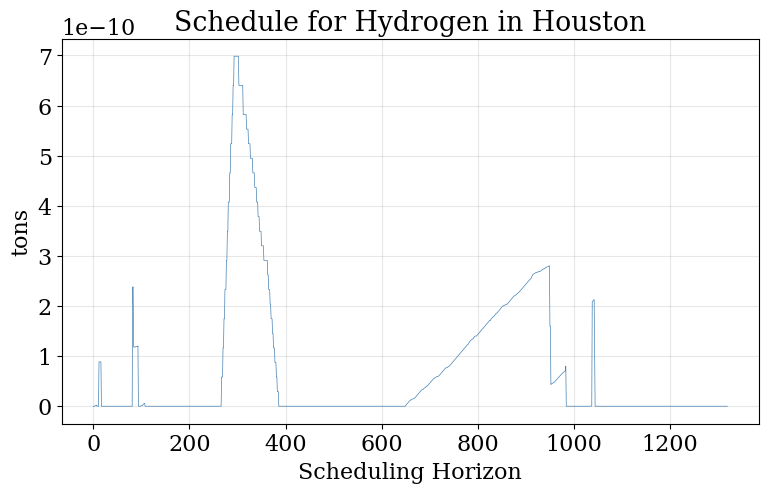

In [33]:

plot_results.schedule(results=results_reduced, y_axis='Inv', component='H2_L',
                      location='HO', fig_size=(9, 5), color='steelblue')